## Covid-19 Data Analysis/Visualisation 

This is a data analysis project on Covid-19 which is being widely spread across the world.This virus spreading started in a city called Wuhan in China which soon spread to the entire world as WHO termed it as Pandemic Disease.
This Project is mainly to understand the Insights on how it spreads using Data Analysis.It comprises of various datasets and modules.
The modules are :
* Indian Statewise Analysis
* Indian Date-wise Analysis
* Indian Council of Medical Research (ICMR) Analysis
* Datewise Cases World
* World wide Geo locator Tracker

Credits to all the people for hosting the Datasets.


Data is Updated as of Date : 12/04/2020 08:50 PM [IST].


### Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import cufflinks as cf
from matplotlib import style
%matplotlib inline
import operator
import plotly
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.offline as po
from plotly.offline import init_notebook_mode
from plotly.offline import iplot
import plotly.graph_objects as pgo
style.use('ggplot')

In [2]:
#to view it in the notebook
po.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
#Indian Statewise data
df=pd.read_csv('covid-19-latest.csv')
df

,State/UT,Confirmed,Active,Recovered,Deceased
0,MAHARASHTRA,1982,1625,208,149
1,DELHI,1154,1102,28,24
2,TAMILNADU,1075,1014,50,11
3,RAJASTHAN,796,671,116,9
4,MADHYA PRADESH,562,478,41,43
5,GUJARAT,516,448,44,24
6,TELANGANA,503,393,96,14
7,UTTAR PRADESH,483,433,45,5
8,ANDHRA PRADESH,420,401,12,7
9,KERALA,375,194,179,2


In [4]:
#Creating new columns for percentage ratio
df['Percentage ratio of recovery']=(df['Recovered']/df['Confirmed'])*100
df['Percentage ratio of Death']=(df['Deceased']/df['Confirmed'])*100
df.head()

,State/UT,Confirmed,Active,Recovered,Deceased,Percentage ratio of recovery,Percentage ratio of Death
0,MAHARASHTRA,1982,1625,208,149,10.494450,7.517659
1,DELHI,1154,1102,28,24,2.426343,2.079723
2,TAMILNADU,1075,1014,50,11,4.651163,1.023256
3,RAJASTHAN,796,671,116,9,14.572864,1.130653
4,MADHYA PRADESH,562,478,41,43,7.295374,7.651246


In [5]:
print("total cases active are : ",df['Active'].sum())
print("*************************************************")
print("total discharged people in india : ",df['Recovered'].sum())
print("*************************************************")
print("total deaths in India : ",df["Deceased"].sum())


total cases active are :  7766
*************************************************
total discharged people in india :  1054
*************************************************
total deaths in India :  325


In [6]:
total_cases_df=df.groupby("State/UT")['Confirmed'].sum().to_frame()
total_cases_df.style.background_gradient(cmap='Purples',low=0.6)

,Confirmed
State/UT,
ANDAMAN & NICOBAR ISLANDS,11
ANDHRA PRADESH,420
ARUNACHAL PRADESH,1
ASSAM,29
BIHAR,64
CHATTISGARH,25
DADRA AND NAGAR HAVELI,1
DELHI,1154
GOA,7


#### Observation :
1. This shows that Maharashtra,Delhi and Tamil Nadu are worst hit states in India and States like Tripura,Mizoram and Arunachal pradesh are least hit with the virus.

In [7]:
df.iplot(kind='bar',y="Confirmed",x='State/UT')

#### Observation :
1. A bar graph representation which is sorted in terms of worst affected to least affected states.

In [9]:
df.iplot(kind='scatter',y="Confirmed",x='State/UT',title="Represenatation of Numbers",xTitle='States',yTitle='Count',mode='lines+markers',size=20,colors='red')

#### Observation :
1. Maharastra with 1982 and mizoram with 1 cases.

In [10]:
df.iplot(kind='scatter',y="Recovered",x='State/UT',title="Represenatation of Numbers/Recovered",xTitle='States',yTitle='Count',mode='lines+markers+text',size=20,colors='green')

#### Observation :
1. The recovery numbers are high in Maharashtra and kerala with least in Jammu and Andhra pradesh.


In [11]:
df.iplot(kind='scatter',y="Deceased",x='State/UT',title="Represenatation of Numbers/Deceased",xTitle='States',yTitle='Count',mode='lines+markers+text',size=20,colors='blue')

#### Observation :
1. Higher number of deaths in Maharashtra and Madhya pradesh followed by Gujarat.

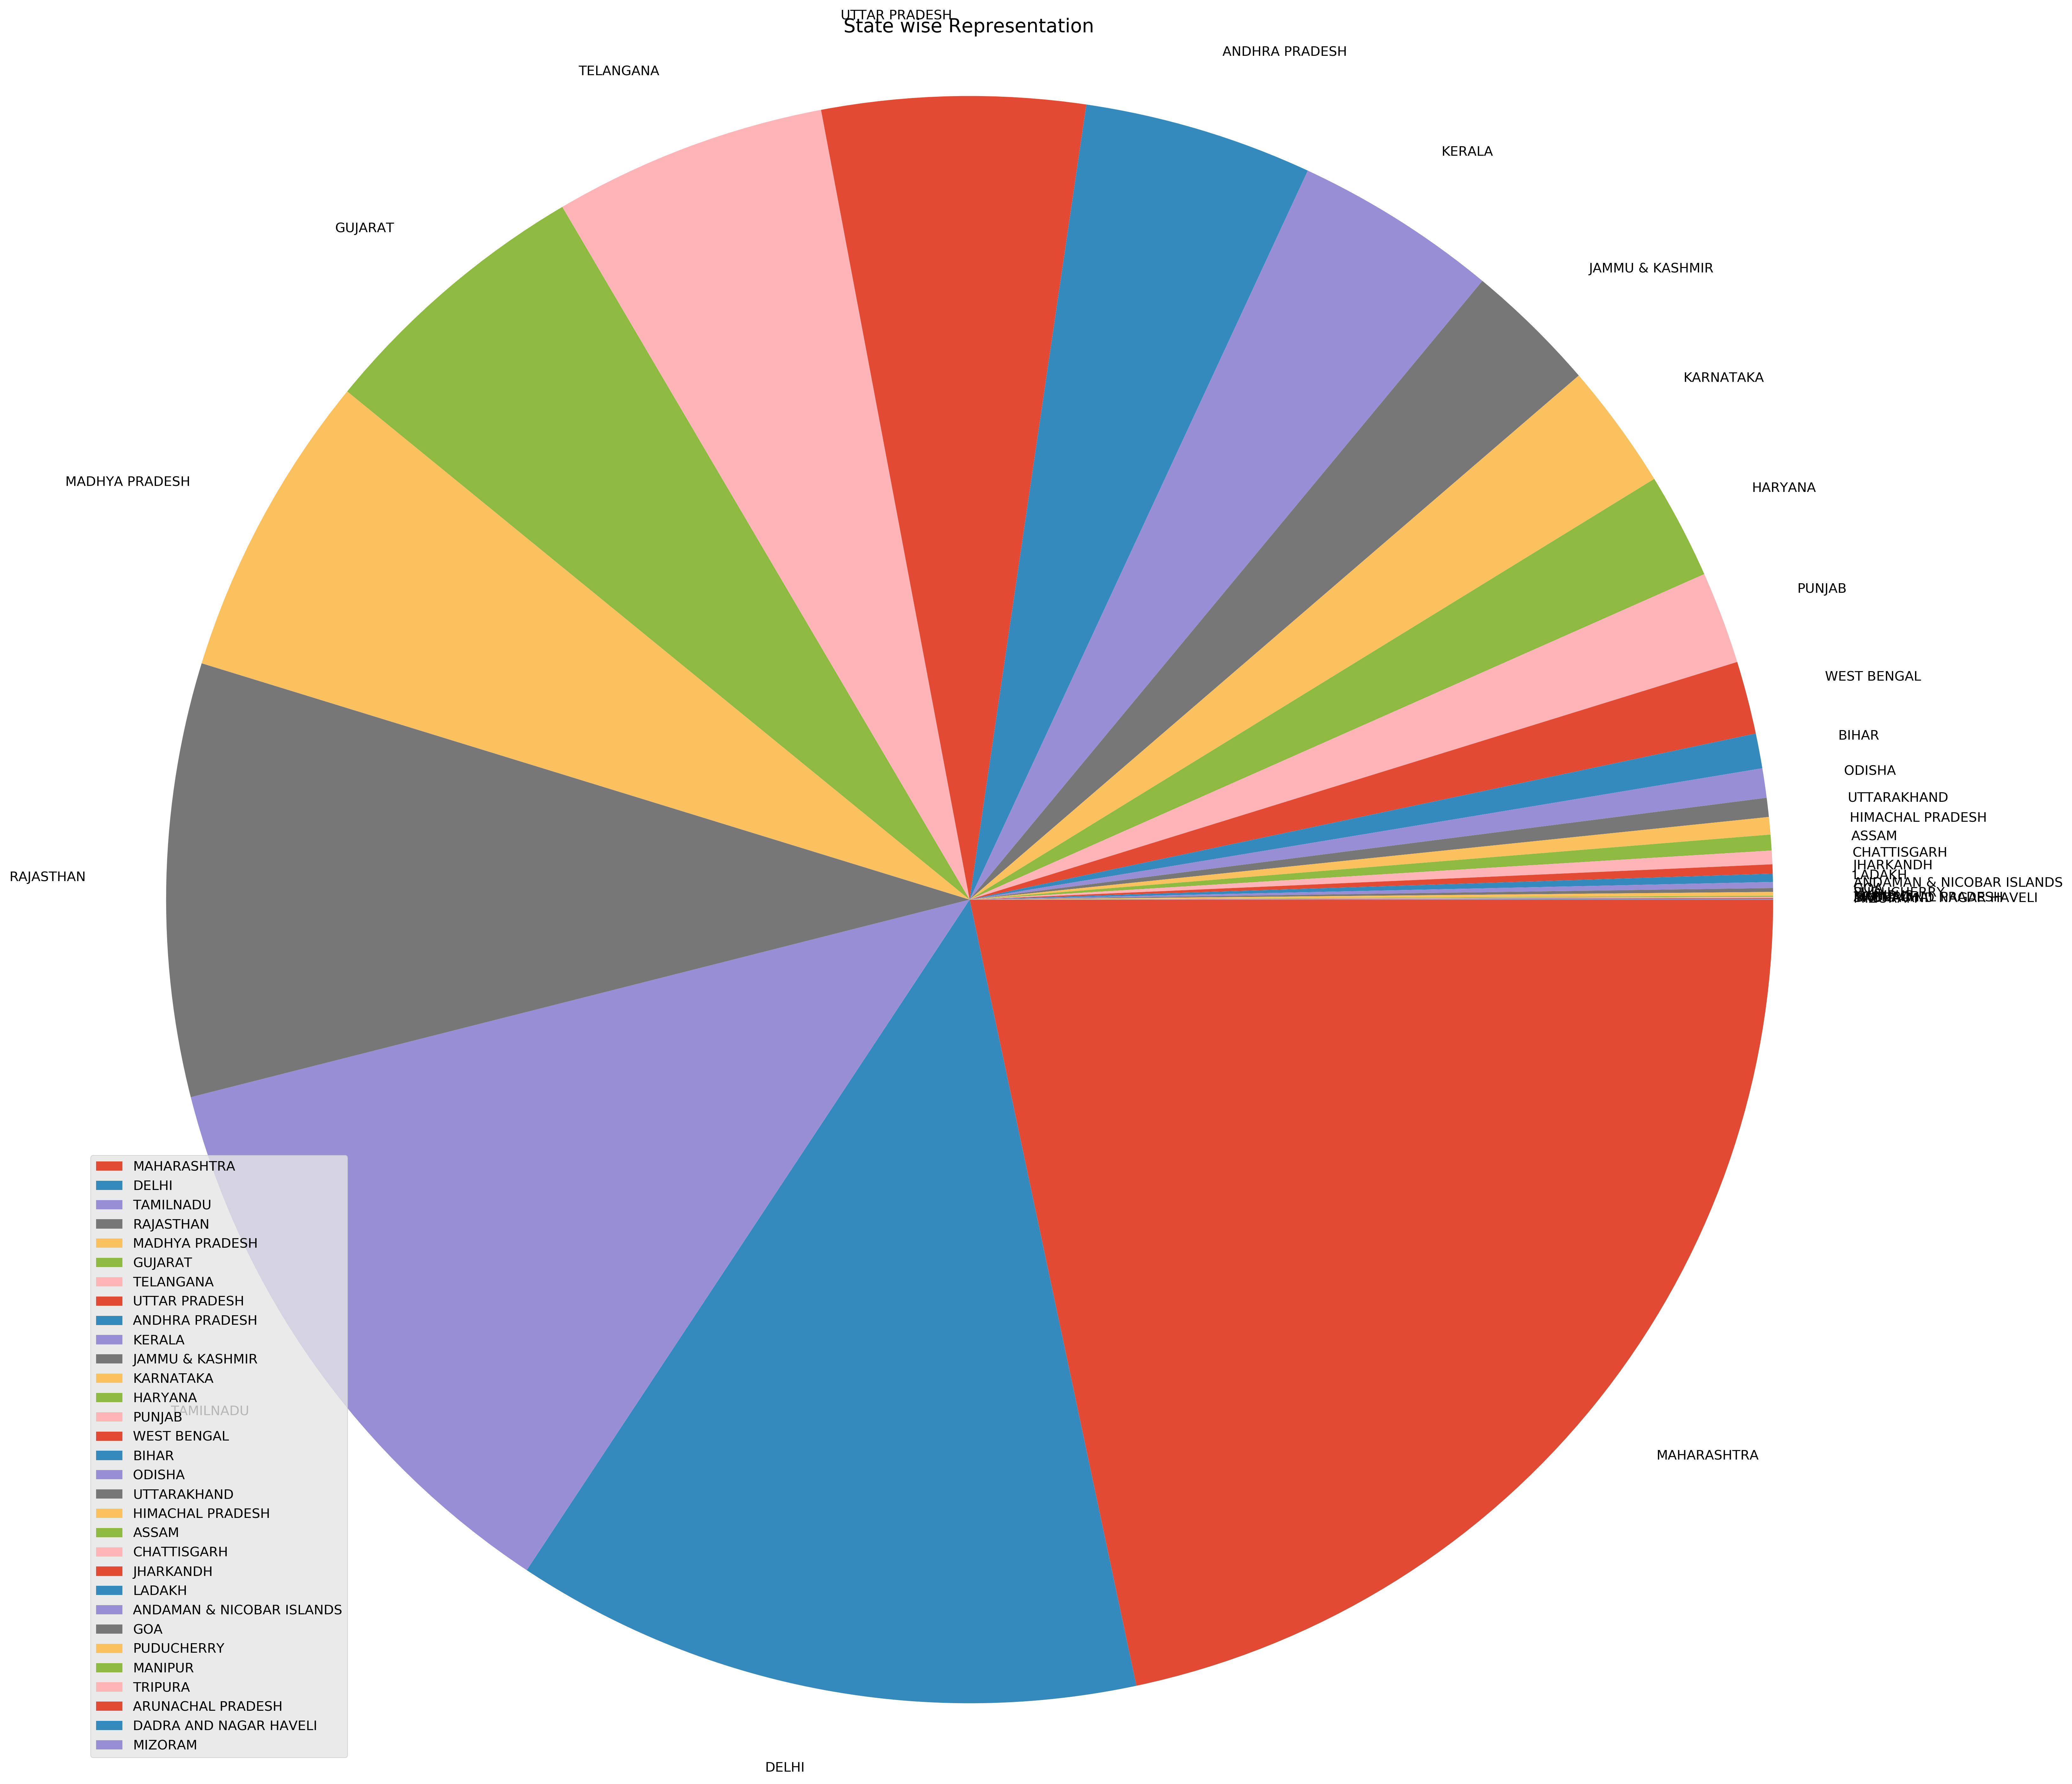

In [8]:
states=df['State/UT'].unique().tolist()
conf=list(df.Confirmed.values)
plt.figure(figsize=(24,24),dpi=300)
plt.pie(conf,counterclock=False,labels=states)
plt.title('State wise Representation')
plt.legend(loc=3)
plt.axis('equal')
plt.show()

#### Observation :
This shows that Maharashtra itself holds Quarter half of the cases in India. 

In [12]:
df.iplot(kind='scatter',y="Percentage ratio of recovery",x='State/UT',title="Represenatation of Percentage Recovered",xTitle='States',yTitle='Count',mode='lines+markers+text',colors='blue')
df.iplot(kind='scatter',y="Percentage ratio of Death",x='State/UT',title="Represenatation of Percentage Death",xTitle='States',yTitle='Count',mode='lines+markers+text',colors='red')

#### Observation :
1. Recovery Percentage is Higher in Andaman,Ladakh,Goa and Kerala.
2. Death Percenatge is higher in Jharkhand,Madhya pradesh,Gujarat.

### DATE WISE DATA FOR INDIA

In [13]:
dd=pd.read_csv('date_wise_data.csv')
dd.drop(['Unnamed: 0'],axis=1,inplace=True)

In [14]:
dd.head()

,Date,Confirmed,Deaths,Cured,Active
0,2020-01-30,1,0,0,1
1,2020-01-31,1,0,0,1
2,2020-02-01,2,0,0,2
3,2020-02-02,3,0,0,3
4,2020-02-03,3,0,0,3


In [15]:
dd.iplot(kind='scatter',x="Date",y="Confirmed",title="Represenatation of Day wise confirmed cases",xTitle='Date',yTitle='Count',mode='lines+markers+text',colors='blue')

#### Observation :
1. The confirmed cases rise rapidly after March 29th.
2. It raised from 1000 to 7800 after March 29th.

In [16]:
fig = make_subplots(rows=1, cols=2,subplot_titles=("Deaths","Cured"))
fig.add_trace(pgo.Scatter(x=dd["Date"],y=dd["Deaths"]),row=1,col=1)
fig.add_trace(pgo.Scatter(x=dd["Date"],y=dd["Cured"]),row=1,col=2)
fig.update_layout(height=600, width=800, title_text="Plots Comparison for Deaths and Cured Over time")
fig.show()

#### Observation :
1. Both Death and cured data rise at equal distribution and the spike is after March 29th.

### ICMR DATASET :

In [17]:
df_icmr=pd.read_csv('ICMR_Testing_Data.csv')
df_icmr.head()

,Unnamed: 0,day,totalSamplesTested,totalPositiveCases,Source,positive_ratio,perday_positive,perday_tests
0,0,13/03/20,6500,78,Press_Release_ICMR_13March2020.pdf,NaN,NaN,NaN
1,1,18/03/20,13125,150,ICMR_website_update_18March_6PM_IST.pdf,1.09,72.0,6625.0
2,2,19/03/20,14175,182,ICMR_website_update_19March_6PM_IST.pdf,3.05,32.0,1050.0
3,3,20/03/20,15404,236,ICMR_website_update_20March_6PM_IST.pdf,4.39,54.0,1229.0
4,4,21/03/20,16911,315,ICMR_website_update_21March_6PM_IST.pdf,5.24,79.0,1507.0


In [18]:
df_icmr.drop(['Unnamed: 0','Source'],axis=1,inplace=True)

In [19]:
df_icmr.iplot(kind='scatter',y="totalSamplesTested",x='day',title="Testing data day wise",xTitle='date',yTitle='Count',mode='lines+text',colors='green')

#### Observation :
1. The testing is done at a gradual increase and ends with 180,000 of tests done successfully.

In [20]:
df_icmr.iplot(kind='bar',y="totalPositiveCases",x='day',title="Testing data day wise",xTitle='date',yTitle='Count',colors='blue')

#### Observation :
1. Testing is increasing day by day and April month has seen a lot of tests.

In [21]:
df_icmr.iplot(kind='scatter',y="positive_ratio",x='day',title="positive percentage for tests daily",xTitle='date',yTitle='Percentage %',colors='cyan')

#### Observation :
1. The positive percentage is differing as it has both highs and lows at period of time.

## World data :

In [22]:
df_ind=pd.read_excel("per_day_cases (1).xlsx",sheet_name="India")
df_italy=pd.read_excel("per_day_cases (1).xlsx",sheet_name="Italy")
df_wuhan=pd.read_excel("per_day_cases (1).xlsx",sheet_name="Wuhan")

In [24]:
fig = make_subplots(rows=1, cols=2,subplot_titles=("Italy","Wuhan"))
fig.add_trace(pgo.Scatter(x=df_italy["Date"],y=df_italy["Total Cases"]),row=1,col=1)
fig.add_trace(pgo.Scatter(x=df_wuhan["Date"],y=df_wuhan["Total Cases"]),row=1,col=2)
fig.update_layout(height=600, width=1200, title_text="Plots Comparison for Italy and wuhan Over time")
fig.show()

#### Observation :
1. In Italy A high rise is seen and we can see no decrease in the cases.
2. In Wuhan,the cases were flattened but again it gave a high rise after 2nd Feb.

In [42]:
fig=px.bar(df_ind,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in India')
fig.show()

#### Observation :
1. It has been a gradual increase of Confirmed cases in India.

In [26]:
fig=make_subplots(rows=1,cols=2,subplot_titles=("Italy","Wuhan"))
fig.add_trace(pgo.Bar(x=df_italy['Date'],y=df_italy['Total Cases']),row=1,col=1)
fig.add_trace(pgo.Bar(x=df_wuhan['Date'],y=df_wuhan['Total Cases']),row=1,col=2)
fig.update_layout(height=600, width=1200, title_text="Plots Comparison for Italy and wuhan Over time")
fig.show()              

#### Observation :
1. In Italy A high rise is seen and we can see no decrease in the cases.
2. In Wuhan,the cases were flattened but again it gave a high rise after 2nd Feb.

## World Date wise data.

In [27]:
df_world=pd.read_csv("complete_data_new_format.csv",parse_dates=['Date'])
df_world

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths
0,NaN,Afghanistan,33.000000,65.000000,2020-01-22,0,0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0
5,NaN,Antigua and Barbuda,17.060800,-61.796400,2020-01-22,0,0
6,NaN,Argentina,-38.416100,-63.616700,2020-01-22,0,0
7,NaN,Armenia,40.069100,45.038200,2020-01-22,0,0
8,Australian Capital Territory,Australia,-35.473500,149.012400,2020-01-22,0,0
9,New South Wales,Australia,-33.868800,151.209300,2020-01-22,0,0


In [28]:
df_world.groupby('Date').sum()

,Lat,Long,Confirmed,Deaths
Date,,,,
2020-01-22,5600.04289,5872.157373,555,17
2020-01-23,5600.04289,5872.157373,654,18
2020-01-24,5600.04289,5872.157373,941,26
2020-01-25,5600.04289,5872.157373,1434,42
2020-01-26,5600.04289,5872.157373,2118,56
2020-01-27,5600.04289,5872.157373,2927,82
2020-01-28,5600.04289,5872.157373,5578,131
2020-01-29,5600.04289,5872.157373,6166,133
2020-01-30,5600.04289,5872.157373,8234,171


In [29]:
confirmed=df_world.groupby('Date').sum()['Confirmed'].reset_index()
death=df_world.groupby('Date').sum()['Deaths'].reset_index()

In [30]:
fig=pgo.Figure()
fig.add_trace(pgo.Scatter(x=confirmed['Date'],y=confirmed['Confirmed'],mode='lines+markers',name='Confirmed'))
fig.add_trace(pgo.Scatter(x=death['Date'],y=death['Deaths'],mode='lines+markers',name='Deaths'))
fig.update_layout(height=600, width=900, title_text="Confirmed and Death cases Over time throughout the world")

#### Observation :
1. There is high growth of Confirmed cases whereas the deaths are slow in inreasing.
2. For Confirmed cases it spiked from March 20th and for deaths in April.

In [31]:
gg=pd.read_csv('geo.csv')

In [44]:
#geo plotiing for COnfirmed cases in the world
fig=px.density_mapbox(gg,lat="latitude",lon="longitude",hover_name="country",hover_data=["Confirmed"],animation_frame="ObservationDate",color_continuous_scale="Portland",radius=7,zoom=0,height=700)
fig.update_layout(title='Timeseries Analysis [world]')
fig.update_layout(mapbox_style="open-street-map",mapbox_center_lon=2)

#### Observation :
1. Europe is the worst affected Continent followed by Asia and Africa.